In [1]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

# Part 1 Data preparation and preprocessing

### Load the seek job market dataset

In [2]:
df = pd.read_csv("data.csv")
# Ignore warning

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


### Initial Dataset Description

Prior to any data preprocessing to get a better description of the data, I will describe the dataset at face value. There are 13 attributes. They are as follows:


<table style="width:70%">
  <tr>
    <th style="width:13%; text-align: center" >Attribute</th>
    <th style="text-align: left">Description</th>

  </tr>
  <tr>
    <td style="text-align: center">ID</td>
    <td style="text-align: left">This seems to the the unique ID that Seek attributes to each job listing. This attribute helps seek with organising their listing in the backend, but in our case, we are looking to analyse all the job listings as a whole, therefore I will be removing this attribute.</td>
  </tr>
  <tr>
    <td style="text-align: center">Title</td>
    <td style="text-align: left">This is the job title. The issue with these is that job titles could mean different levels in different companies, but we may be able to extract information if the title includes "junior" or "senior" to help segment this data.</td>
  </tr>
  <tr>
    <td style="text-align: center">Company</td>
    <td style="text-align: left">This refers to the company hiring. It is categorical data.</td>
  </tr>
  <tr>
    <td style="text-align: center">Date</td>
    <td style="text-align: left">This is the date in which the jobposting was made. It has a time stamp in the number which could be used for further analysis, but for simplicity, I will be removing the time. This is continuous data.</td>
  </tr>
  <tr>
    <td style="text-align: center">Location</td>
    <td style="text-align: left">This categorical data shows the broad location where the job is.</td>
  </tr>
  <tr>
    <td style="text-align: center">Area</td>
    <td style="text-align: left">The area is a more indepth area within a location.</td>
  </tr>
  <tr>
    <td style="text-align: center">Classification</td>
    <td style="text-align: left">This refers to the industry sector of the job. This is standardised categorical data</td>
  </tr>
      <tr>
    <td style="text-align: center">Sub-Classification</td>
    <td style="text-align: left">This refers to the type of job within the industry sector. This is standardised categorical data too</td>
  </tr>
  <tr>
    <td style="text-align: center">Requirements</td>
    <td style="text-align: left">Text data that provides a short list of requiremnts for the job</td>
  </tr>
  <tr>
    <td style="text-align: center">Full Description</td>
    <td style="text-align: left">A long description of what the job entails.</td>
  </tr>
  <tr>
    <td style="text-align: center">Highest Salary</td>
    <td style="text-align: left">The highest salary offered by the comapny for the job.</td>
  </tr>
  <tr>
    <td style="text-align: center">Lowest Salary</td>
    <td style="text-align: left">The lowest salary offered by the company for the job </td>
  </tr>
  <tr>
    <td style="text-align: center">Job Type</td>
    <td style="text-align: left">This different types of employment one can have. They are full time, part time, contract/temp, casual/vacation</td>
  </tr>
</table>


In [4]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

### Data Preparation and preprocessing

#### Calculate the average salary
Salary ranges can be used to compare different jobs, but one has to compare ranges which can be confusing - comparing the average salary of jobs makes it easier to compare salaries.

In [5]:
#Your code here
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)

#### Remove ID
As mentioned above, we are looking to anaylse the job market as a whole, making the seek unique ID for jobs not necessary

In [6]:
print("\nRemoval of Id column reduces attributes in dataset from ", df.shape[1], end="")
df.drop('Id', axis=1, inplace=True)
print(" to ", df.shape[1])


Removal of Id column reduces attributes in dataset from  14 to  13


#### Clean Date
In the date value, there is a time component to the date - for simplicity of analysis, I will be removing the time componenet and focus on the date itself

In [7]:
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.dtypes

Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

#### Check for duplicates

In [9]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)
df.drop_duplicates(keep="last")

Duplicates found:  8607
Additional duplicates found without regard to timestamp:  6724


,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


In [10]:
nulls = df.isnull().sum()
total_values = df.shape[0]
print("Attributes and their percentage of missing data:")
for i in range(len(nulls)):
    print("{:>18}:".format(df.columns.values[i]), end=" ")
    print("{:.2f}%".format((nulls[i] / total_values) * 100))

Attributes and their percentage of missing data:
             Title: 0.00%
           Company: 3.77%
              Date: 0.00%
          Location: 38.07%
              Area: 61.49%
    Classification: 38.07%
 SubClassification: 38.07%
       Requirement: 0.00%
   FullDescription: 5.08%
      LowestSalary: 0.00%
     HighestSalary: 0.00%
           JobType: 5.05%
     AverageSalary: 0.00%


Area is the attribute with the most missing data. It is suspected that only large cities contain a value for area. This will be investigates further.
The percentege of missing data for location classification and subclassification seems to be the same. This needs to be investigated further too.
Company, full description and job type seems to have to have some missing data, but for the most part this a small number, so it will not be investigated futher

#### Check for area missing data

In [11]:
df_area = df[(df['Area'].isna()==False) & (df['Location'].isna()==False)]
print(df_area['Location'].unique())

['Sydney' 'Brisbane' 'Melbourne' 'Perth']


Syndey, Brisbane, Melbourne and Perth are the only places where location and area is present

#### Check the missing location classification and subclassification

In [12]:
df_missing_data = df[(df['Classification'].isna()==True)&(df['SubClassification'].isna()==True)&(df['Location'].isna()==True)]
missing_data_dates = df_missing_data.sort_values('Date')['Date'].dropna().unique()
missing_data_start = missing_data_dates[0]
print(missing_data_start)
missing_data_end = missing_data_dates[len(missing_data_dates)-1]
print(missing_data_end)

2018-12-16T00:00:00.000000000
2019-03-13T00:00:00.000000000


Date range where data is missing

In [13]:
df_reduced = df[df['Date'] < missing_data_start]
print(df_reduced[['Location', 'Classification', 'SubClassification']].isnull().sum())

Location             0
Classification       0
SubClassification    0
dtype: int64


In [14]:
df_reduced = df[df['Date'] > missing_data_end]
print(df_reduced[['Location', 'Classification', 'SubClassification']].isnull().sum())

Location             0.0
Classification       0.0
SubClassification    0.0
dtype: float64


Double checking before and after that the dates if the data is missing. It is not

In [15]:
#Save the cleaned and preprocessed dataset - this was taken from the tutorial but it missed out removing the index, so I have done that.
df.to_csv("preprocessed_data.csv", index=False)

With the completion of data preprocessing, I saved the processed data so it would not have to be done again.

# Data Preparation and preprocessing summary

## Data first impressions
The data was loaded in using the read_csv() funciton from Pandas. Upon initial inspection of the data, all the attributes had the data type object expect for LowestSalary and HighestSalary - the date attribute needed to be converted to an appropriate data type. The attribute ID needed to be removed as it's purpose is to help Seek with their organisation of data, but for the purposes of this analysis, this data is irrelevant to contributing to the analysis of job market data, hence it was removed.

## Data types 
<ul>
    <li>The date column was converted to datetime data type, making it easier for data manipulation. The time component was also removed, as I will focus only on date ranges.</li>
    <li>The ID column was removed</li>
</ul>

## Duplicate data
<ul>
    <li>Identical duplicates were deleted</li>
    <li> There are duplicates that were posted at different dates. While it's easier to delete these values, it may be a mistake to do so, as the same listing could be creating twice and different time frames due to an inability to fill a position. As such, these duplicates were not deleted.</li>
</ul>

## Missing data
<ul>
    <li>Area has the most missing attributes at 61.49%. Upon further invesitgation, this was due to the area attribute only being filled in for major cities, those being Sydney, Brisbane, Melbourne, and Perth. This also indicates that 100-61.49 = 38.51% of jobs are not within the large cities.</li>
    <li>Classification, SubClassification and Location had the same amount of missing values, and upon futher investigation this was only for the date ranges of 16 December 2018 to 13 March 2019. Classification, SubClassification and Location can only be found from 1 October 2018 to 16 December 2018</li>
    <li>Company, Jobtype and Full description have a small amount of missing values. This is noted so that there is precaution when taking conclusions from those specific attributes.</li>
</ul>

## Hypothesis
<ul>
    <li>With Canberra being the seat of the australian government, I expect that Canberra has the highest proportion of government jobs</li>
    <li>The larger the city, the more competitive the salaries will be</li>
    <li>Offering for part time jobs will mostly be for retail/consumer jobs and hospitality/tourism jobs.</li>
    <li>With this dataset being pre-covid, I expect that the most popular classifications of jobs will be IT jobs, hospitality and tourism.</li>
</ul>

# -------------------------------------------------------------------------------------------------

# Part 2: Data Analysis and Interpretation

## Job Meta Data

In this section, I analyse the job metadata, looking at the attributes without going into too much detail. More in depth analysis will come later in the document

In [16]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Average salary

In [17]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [18]:
#Group by average salary and count the numbers
average_salary_df = df.groupby('AverageSalary').count()
average_salary_df['AverageSalary'] = (average_salary_df.index*1000).astype(float).map('{:,.0f}'.format)
average_salary_df['Count'] = average_salary_df["Title"]

In [19]:
#Analysing salary ranges

low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df[df['LowestSalary']==x]))
df_salary_ranges['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])

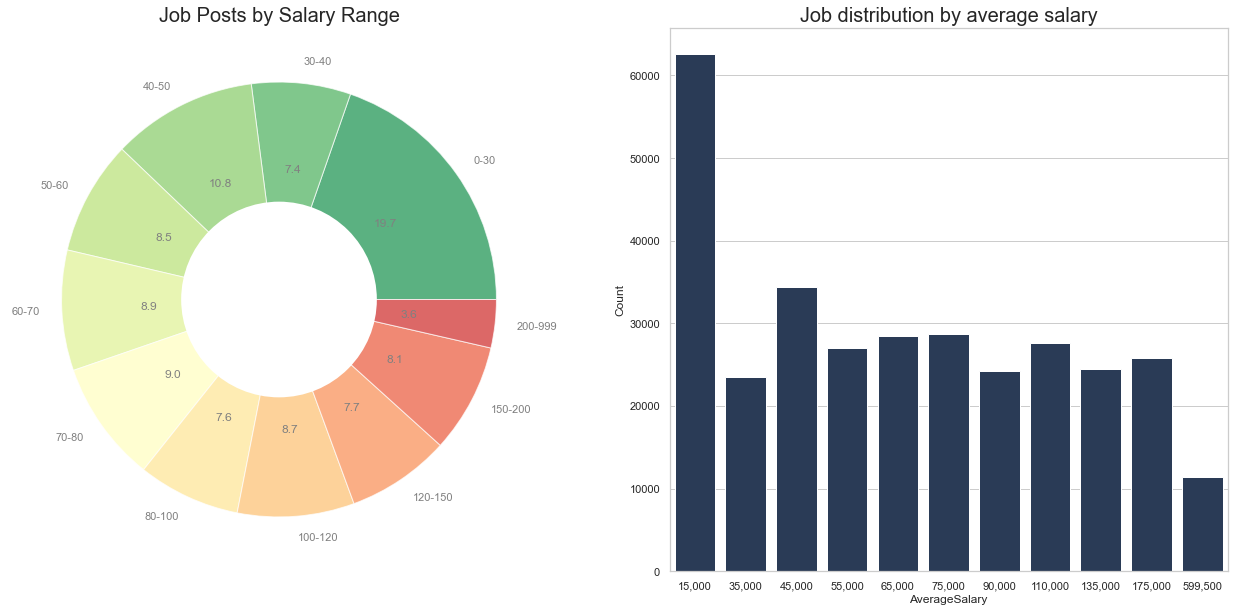

In [20]:

sns.set()
sns.set_style("whitegrid")

#create layout
fig, axes = plt.subplots(1, 2, figsize=(22,10))

#salary ranges plot
p, texts, autotexts = axes[0].pie(df_salary_ranges['Count'], colors=sns.color_palette("RdYlGn_r", len(df_salary_ranges)),labels=df_salary_ranges['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
axes[0].title.set_text('Job Posts by Salary Range')
axes[0].title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
axes[0].add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)
    
#jobtype plot    
sns.barplot(ax=axes[1], data=average_salary_df, x="AverageSalary", y="Count", color="#23395d")
axes[1].title.set_text('Job distribution by average salary')
axes[1].title.set_size(20)
    
plt.show()

### Assumptions
The assumption that salary is the average salary x 1000 is taken from the assignment help video.

### Observations
<ul>
    <li>There are 11 salary ranges, an the largest salary range is 0-30, encompassing 19.7%, amounting to ~60,000 listing.</li>
    <li>The smallest salary range is the highest range of 200-999, and it only encompasses 3.6%, amounting to ~10,000 listings.</li>
    <li>The salary ranges in between roughly have 8% share each, roughly 27,500 listings per salay range and average salary.</li>
</ul>
    

### Job Type

In [21]:
#Group by jobtype
job_type_df = df.groupby('JobType').count()
job_type_df['Count'] = job_type_df["Title"]
job_type_df['JobType'] = job_type_df.index
job_type_df

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,AverageSalary,Count,JobType
JobType,,,,,,,,,,,,,,
Casual/Vacation,25355,23872,25355,16285,8751,16285,16285,25353,25342,25355,25355,25355,25355,Casual/Vacation
Contract/Temp,53906,53085,53906,33962,20878,33962,33962,53906,53901,53906,53906,53906,53906,Contract/Temp
Full Time,201225,192847,201225,122142,77946,122142,122142,201224,201169,201225,201225,201225,201225,Full Time
Part Time,21893,20906,21893,13347,7862,13347,13347,21889,21890,21893,21893,21893,21893,Part Time


In [22]:
start = 0
full_time = job_type_df["Count"]["Full Time"]
contract_temp = job_type_df["Count"]["Contract/Temp"]
casual_vacation = job_type_df["Count"]["Casual/Vacation"]
part_time = job_type_df["Count"]["Part Time"]

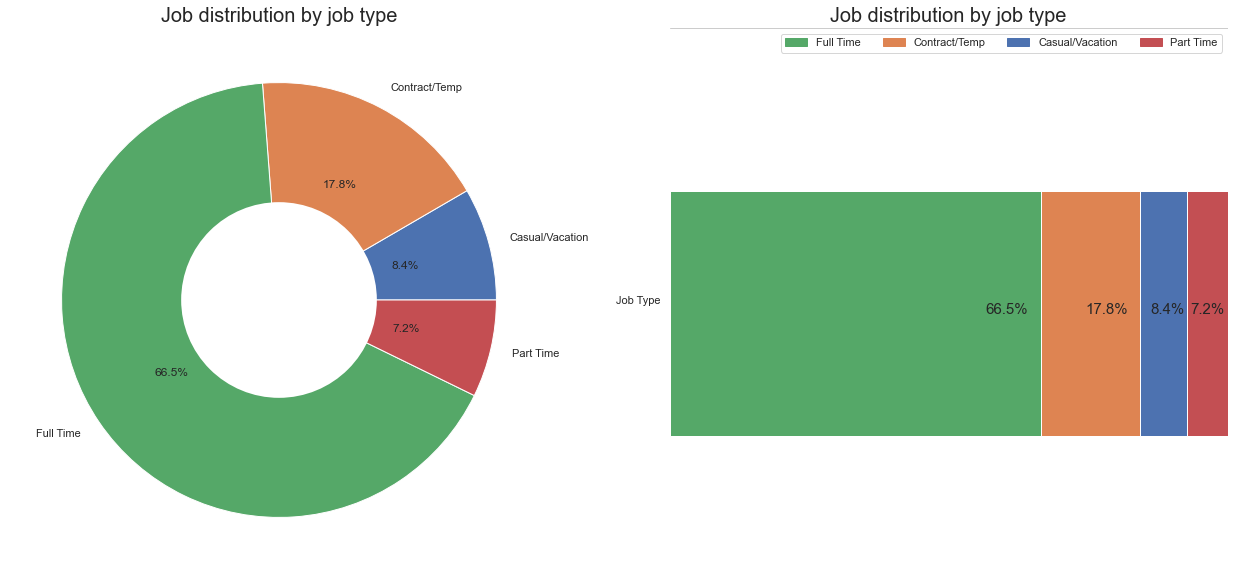

In [23]:
#create layout
fig, axes = plt.subplots(1, 2, figsize=(22,10))

#salary ranges plot
axes[0].pie(
    job_type_df['Count'],
    labels=job_type_df['JobType'],
    autopct="%.1f%%"
)
axes[0].title.set_text('Job distribution by job type')
axes[0].title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
axes[0].add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)

axes[1].broken_barh([(start, full_time),
                (full_time, full_time + contract_temp),
                (full_time + contract_temp, full_time + contract_temp + casual_vacation),
                (full_time + contract_temp + casual_vacation, full_time + contract_temp + casual_vacation + part_time)],
               [10, 9], facecolors=('#55A868', '#DE8452', '#4D72B0', "#C34F53"))
axes[1].set_ylim(5, 15)
axes[1].set_xlim(0, job_type_df["Count"].sum()) # that is the sum of counts of all jobs
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_yticks([15, 25])
axes[1].set_xticks([])

axes[1].set_axisbelow(True) 

axes[1].set_yticklabels(['Job Type', ' '])
axes[1].title.set_size(20)

axes[1].grid(axis='x')
axes[1].text(full_time-30000, 14.5, "66.5%", fontsize=15)
axes[1].text((full_time + contract_temp)-30000, 14.5, "17.8%", fontsize=15)
axes[1].text((full_time + contract_temp + casual_vacation)-20000, 14.5, "8.4%", fontsize=15)
axes[1].text((full_time + contract_temp + casual_vacation + part_time)-20000, 14.5, "7.2%", fontsize=15)

axes[1].title.set_text('Job distribution by job type')

leg1 = mpatches.Patch(color='#55A868', label='Full Time')
leg2 = mpatches.Patch(color='#DE8452', label='Contract/Temp')
leg3 = mpatches.Patch(color='#4D72B0', label='Casual/Vacation')
leg4 = mpatches.Patch(color='#C34F53', label='Part Time')
axes[1].legend(handles=[leg1, leg2, leg3, leg4], ncol=4)
    
plt.show()

### Observation
<ul>
    <li>There are four different job types. They are: Full Time, Contract/Temp, Casual/Vacation, Part Time</li>
    <li>Full time is the most offered job type at 66.5% followed by Contract/Temp at 17.8%, with Casual/Vaction and Part time roughly similar at ~8%</li>
    <li>In my hypothesis I mention the distribution of sectors within job types, an that will be looked at later</li>
    <li>Unrelated to analysis, I find that the stacked bar chart is much easier to compare ratios than the donut chart, however the donut chart is easier to code and reproduce.</li>
</ul>

## Study market by locations

In [24]:
location_df = df[df['Location'].isna()==False]
location_df = location_df.groupby('Location').count()
location_df['Location'] = location_df.index
location_df['Count'] = location_df["Title"]
location_df.sort_values("Count", ascending=False, inplace=True)
location_df

,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,
Sydney,60765,58919,60765,53778,60765,60765,60765,57456,60765,60765,57470,60765,Sydney,60765
Melbourne,46690,44941,46690,41297,46690,46690,46686,43821,46690,46690,43827,46690,Melbourne,46690
Brisbane,21466,20612,21466,17412,21466,21466,21466,20214,21466,21466,20221,21466,Brisbane,21466
Perth,13198,12766,13198,10171,13198,13198,13198,12287,13198,13198,12298,13198,Perth,13198
Adelaide,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


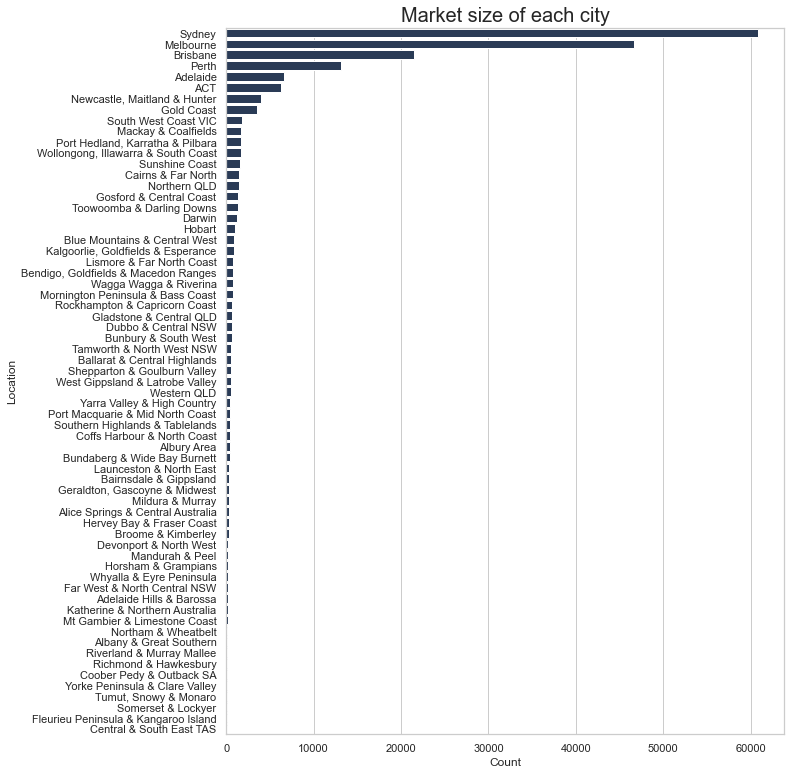

In [25]:
plt.figure(figsize=(10,13))
sns.barplot(
    data=location_df,
    x="Count",
    y="Location",
    color="#23395d",
    order=location_df["Location"]
)

plt.title("Market size of each city", fontdict = {'fontsize': 20})
plt.show()

In [26]:
#Get top 10 big cities
location_df = location_df.sort_values(by=["Count"], ascending =False)
location_top_10_df = location_df[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [location_df["Count"][10:].sum()]
})
location_top_10_df = pd.concat([location_top_10_df, new_row],sort=False)
location_top_10_df.index = location_top_10_df['Location']

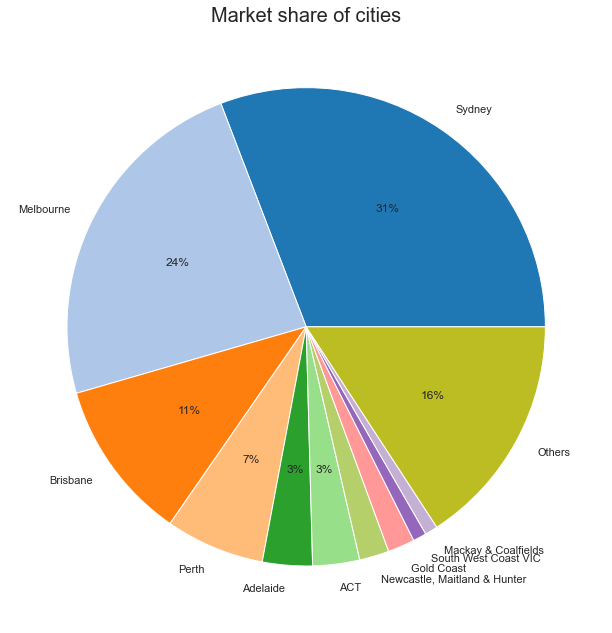

In [27]:
def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 3 else ''

plt.figure(figsize=(11,11))
plt.title("Market share of cities", fontdict = {'fontsize': 20})
plt.title
plt.pie(
    location_top_10_df['Count'],
    labels=location_top_10_df['Location'],
    colors=colors,
    autopct=my_autopct
)
plt.show()

### Observations
<ul>
    <li>There are 65 locations</li>
    <li>The top five job markets on Seek are Sydney, Melbourne, Brisbane, Perth and Adelaide, with Melbourne and Sydney accounting for over 50% of the market. Unsurprisingly, these are the most populated areas of Ausralia</li>
    <li>The smallet job markets on Seek are Central and South East Tasmania and Flerieus and Kangaroo island - this makes sense as they are some of the least populous areas of Australia.</li>
</ul>
    
    

### Classifications

In [28]:
classification_df = df[df['Classification'].isna()==False]
classification_df = classification_df.groupby('Classification').count()
classification_df['Classification'] = classification_df.index
classification_df['Count'] = classification_df["Title"]
classification_df.sort_values("Count", ascending=False, inplace=True)

In [29]:
classification_df

,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,
Information & Communication Technology,22796,22447,22796,22796,16090,22796,22796,21162,22796,22796,21163,22796,Information & Communication Technology,22796
Trades & Services,17976,16500,17976,17976,9671,17976,17976,17125,17976,17976,17126,17976,Trades & Services,17976
Healthcare & Medical,17085,16390,17085,17085,7961,17085,17085,16380,17085,17085,16383,17085,Healthcare & Medical,17085
Hospitality & Tourism,15523,14890,15523,15523,9642,15523,15523,14294,15523,15523,14298,15523,Hospitality & Tourism,15523
"Manufacturing, Transport & Logistics",12376,11465,12376,12376,8545,12376,12376,11752,12376,12376,11754,12376,"Manufacturing, Transport & Logistics",12376
Administration & Office Support,10020,9534,10020,10020,6843,10020,10020,9215,10020,10020,9215,10020,Administration & Office Support,10020
Accounting,9368,9056,9368,9368,7308,9368,9368,8760,9368,9368,8760,9368,Accounting,9368
Education & Training,9280,9037,9280,9280,5868,9280,9280,8714,9280,9280,8718,9280,Education & Training,9280
Construction,8372,8042,8372,8372,5057,8372,8372,8022,8372,8372,8023,8372,Construction,8372


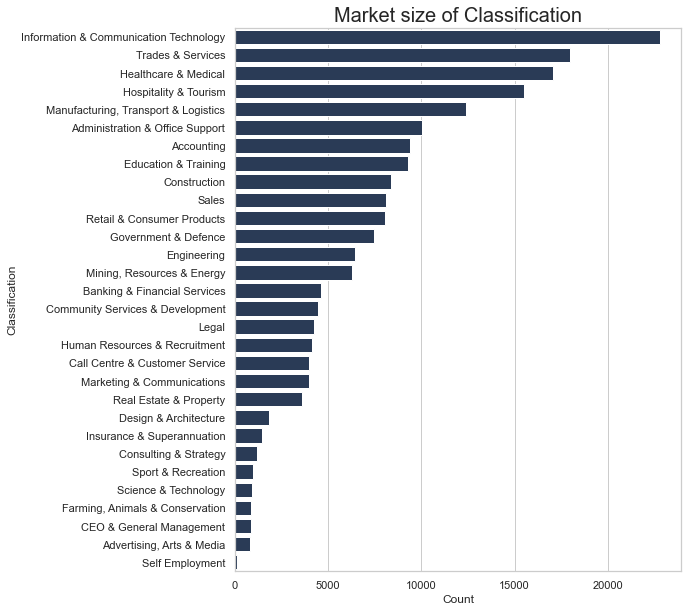

In [30]:
plt.figure(figsize=(8,10))
sns.barplot(
    data=classification_df,
    x="Count",
    y="Classification",
    color="#23395d",
    order=classification_df["Classification"]
)

plt.title("Market size of Classification", fontdict = {'fontsize': 20})
plt.show()

### Observations
<ul>
    <li>There are 30 different classification of jobs</li>
    <li>The top five most adverstised classifications are
        <ol>
            <li>Information & Communication Technology</li>
            <li>Trades & services</li>
            <li>Healthcare & Medical</li>
            <li>Hospitality & Tourism</li>
            <li>Manufacturing, Transport & Logistivsc</li>
        </ol>
    </li>
    <li>The least advertised classifications are
        <ol>
            <li>Self Employment</li>
            <li>Advertising, Arts & Media</li>
            <li>CEO & General Management</li>
            <li>Farming, Animals & Conservation</li>
            <li>Science & Technology</li>
        </ol>
    </li>
    
</ul>

## Study Market by locations

In [31]:
# Groups what would be small pie slices into an 'others' group
def group_others(thr, df):
    '''Needs to have a "Count" column'''
    
    #calculate percentages
    total = df['Count'].sum()
    df['Percent'] = df['Count'].apply(lambda x: x*100/total)
    df = df.sort_values(by=['Count'], ascending=False, ignore_index=True)
    
    above_threshold = df.loc[df['Percent'] > thr]
    others = df.loc[df['Percent'] < thr].sum()

    # check if anything has been grouped as others
    if others['Count'] > 0:
        
        # check if a SubClass called 'Other' already exists
        # and if yes, append it to the new 'Others' column
        if 'SubClassification' in df and 'Other' in df['SubClassification'].tolist():

                # append the two 'Others' columns together and drop the old one
                others['Count'] = others['Count'] + df[df['SubClassification']=='Other']['Count']
                others['Percent'] = others['Percent'] + df[df['SubClassification']=='Other']['Percent']
                index = df.index[df["SubClassification"]=='Other'].tolist()[0]
                above_threshold = above_threshold.drop([index])
               
        others['Classification'] = 'Others'
        others['SubClassification'] = 'Others'
        return above_threshold.append(others, ignore_index=True)
    else:
        
        return above_threshold

In [32]:
# Find locations
locations = df['Location'].dropna().unique()
# Convert to data frame
map_df = pd.DataFrame({"Location": locations})
# Find classifications
classifications = df['Classification'].dropna().unique()
#Convert classifications to frame
df_class = pd.DataFrame({"Classification":classifications})

In [33]:
def update(Location):
#     fig = plt.figure(figsize=(10,10))
#     ax = fig.add_subplot(111)
    
    
    #get total count of jobs for each classification (for current location only)
    df_class['Count'] = df_class['Classification'].apply(lambda x: pd.Series(len(df[(df['Location']==Location)&(df['Classification']==x)])))
    
    #group the classifications that have < 1% together into 'others' category
    plot_df = group_others(1, df_class)

    fig = plt.figure(figsize=(10,10))
    loc_lot = fig.add_subplot(111)
    total_job_count = sum(df_class['Count'])

    loc_plot = sns.barplot(x=plot_df['Count'], y=plot_df['Classification'], color="#23395d")
    plt.title('\nClassification split in {0}\n'.format(Location),size=22)
    plt.ylabel("Classification", size=14)
    plt.xlabel('Number of Jobs', size=14)
    
    #Spacer to make the label appear next to bar
    spacer = loc_plot.patches[0].get_width()*0.072
    
    # Add percentages as text on barplot
    for i, p in enumerate(loc_plot.patches):
        _x = p.get_width() + spacer
        _y = p.get_y() + p.get_height() / 2 + 0.2
        value = "{:.1f}%".format(plot_df["Percent"][i])
        loc_plot.text(_x, _y, value, ha="right", size=13, color="Black")




interact(update,Location=locations);

interactive(children=(Dropdown(description='Location', options=('Sydney', 'Richmond & Hawkesbury', 'Brisbane',…

### Observations
<ul>
    <li>This graph helps see what is the makeup of jobs in certain areas</li>
    <li>Surprisingly to me, in the ACT the highest proportion of jobs is in Information and Communication Technology, with Government and Defence coming second. What could be the case is that it's an Information and Communication Technology job for the government, but not a traditional government role</li>
</ul>

In [34]:
def update(Location1, Location2):

    my_colours = ["#DE8452", "#55A868", "#C34F53", "#8172B3", "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#65B5CD", "#4D72B0", "#C88B2B" ]
    low = df['LowestSalary'].dropna().unique()
    high = df['HighestSalary'].dropna().unique()
    assert(len(low)==len(high))
    
    # Create data frame to house salary ranges for location1
    df_salary_ranges_location1 = pd.DataFrame({"Low": low, "High":high})
    df_salary_ranges_location1['Count'] = df_salary_ranges_location1['Low'].apply(lambda x: pd.Series(len(df[(df['Location']==Location1)&(df['LowestSalary']==x)])))
    df_salary_ranges_location1['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])
    
    # Create data frame to house salary ranges for location2
    df_salary_ranges_location2 = pd.DataFrame({"Low": low, "High":high})
    df_salary_ranges_location2['Count'] = df_salary_ranges_location2['Low'].apply(lambda x: pd.Series(len(df[(df['Location']==Location2)&(df['LowestSalary']==x)])))
    df_salary_ranges_location2['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])
    
    fig, axes = plt.subplots(2, 1, figsize=(20,7))

    my_colours = ["#DE8452", "#55A868", "#C34F53", "#8172B3", "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#65B5CD", "#4D72B0", "#C88B2B" ]

    left_value = 0

    for x in range(df_salary_ranges.shape[0]):
        axes[0].barh(Location1, df_salary_ranges_location1["Count"][x], left=left_value,label=df_salary_ranges_location1["Label"][x], color=my_colours[x])
        left_value += df_salary_ranges_location1["Count"][x]
        
    left_value = 0
    for x in range(df_salary_ranges.shape[0]):
        axes[1].barh(Location2, df_salary_ranges_location2["Count"][x], left=left_value,label=df_salary_ranges_location2["Label"][x], color=my_colours[x])
        left_value += df_salary_ranges_location2["Count"][x]
        
    axes[0].set_title('Salary Distribution')
    axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


interact(update,Location1=locations, Location2=locations)

print("Please note that the intended purpose of this graph is to compare ratios, not to compare absolute values")

interactive(children=(Dropdown(description='Location1', options=('Sydney', 'Richmond & Hawkesbury', 'Brisbane'…

Please note that the intended purpose of this graph is to compare ratios, not to compare absolute values


### Observations
<ul>
    <li>The salary distribution between Melbourne and Sydney shows that Sydney offers more proportion of higher salaries than Melbourne</li>
    <li>When comparing the distribution of salaries most locaitons, it seems that the proportion of 0-30 and 30-40 salary ranges stays roughly the same. The changes seem to start appearing with the 40-50 salary range</li>
    <li>When comparing rural towns to rural mining towns, i.e. Toowomba & Darling Downs with Mackay & Coalfields, there are much more higher paying jobs in mining towns than in non-mining towns.</li>
</ul>

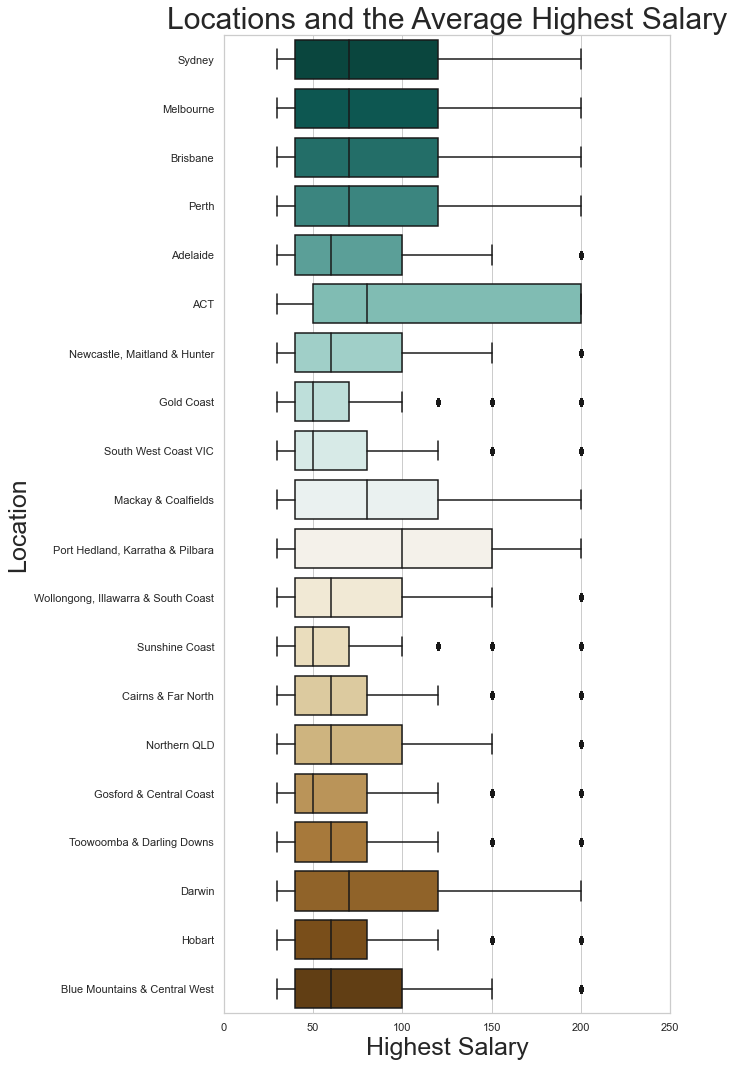

In [35]:
#get a list of locations ordered by Highest Salary (Average) descending
df_location = df[df['Location'].isna()==False]
df_top_20 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:20]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_20)]

plt.figure(figsize=(8,18))

box_plt_high = sns.boxplot(x='HighestSalary',y='Location',data=df_salary_locations_high, order=df_top_20,palette='BrBG_r', orient="h")
# box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.xlabel('Highest Salary',fontsize=25)
plt.ylabel('Location',fontsize=25)

plt.xlim([0,250])
plt.show()

### Observations
<ul>
    <li>The ACT has the the most equal distribution of salary out of all large cities</li>
    <li>Port Hedland Karattha & Pibara has the highest median salary</li>
</ul>

## Study Market by Sectors

In [36]:
# Groups what would be small pie slices into an 'others' group
def Group_others_location(thr, df):
    '''Needs to have a "Count" column'''
    
    #calculate percentages
    total = df['Count'].sum()
    df['Percent'] = df['Count'].apply(lambda x: x*100/total)
    df = df.sort_values(by=['Count'], ascending=False, ignore_index=True)
    
    above_threshold = df.loc[df['Percent'] > thr]
    others = df.loc[df['Percent'] < thr].sum()
    others["Location"] = "Others"

   
    return above_threshold.append(others, ignore_index=True)


In [37]:
# Find locations
locations = df['Location'].dropna().unique()
# Convert to data frame
map_df = pd.DataFrame({"Location": locations})
# Find classifications
classifications = df['Classification'].dropna().unique()
#Convert classifications to frame
class_df = pd.DataFrame({"Classification":classifications})

In [38]:
def update(Classification):
    
    
    #get total count of jobs for each location (for current classification only)
    map_df['Count'] = map_df['Location'].apply(lambda x: pd.Series(len(df[(df['Classification']==Classification)&(df['Location']==x)])))
    
    #group the location that have < 1% together into 'others' category
    plot_df = Group_others_location(1, map_df)

    fig = plt.figure(figsize=(10,10))
    loc_lot = fig.add_subplot(111)
    total_job_count = sum(map_df['Count'])


    loc_plot = sns.barplot(x=plot_df['Count'], y=plot_df['Location'], color="#23395d")
    plt.title('\nLocation split for {0}\n'.format(Classification),size=22)
    plt.ylabel("Location", size=14)
    plt.xlabel('Number of Jobs', size=14)
    
    #Spacer to make the label appear next to bar
    spacer = loc_plot.patches[0].get_width()*0.072
    
    # Add percentages as text on barplot
    for i, p in enumerate(loc_plot.patches):
        _x = p.get_width() + spacer
        _y = p.get_y() + p.get_height() / 2 + 0.2
        value = "{:.1f}%".format(plot_df["Percent"][i])
        loc_plot.text(_x, _y, value, ha="right", size=13, color="Black")



interact(update,Classification=classifications);

interactive(children=(Dropdown(description='Classification', options=('Retail & Consumer Products', 'Call Cent…

### Observations
<ul>
    <li>Across almost all classifications, the largest jobmarkets for each always are Sydney Melbourne, Brisbane and Perth. This should come as no surprise as they are the largest jobmarkets in Australia. The variation in locations comes in the locations after the aforementioned four</li>
    <li>For Government and Defence jobs, to my surprise the ACT does not rank near the top, but after looking at the subclassifications below it makes perfect sense  - a marjority of those jobs are in State and Local goverment jobs, rather than Federal, and with the Victoria and New South Wales having large state and local governments, they will have many joblistings for those subclassifications too. If I were to look closer, I would assume that the majority of federal jobs are in the ACT </li>
    <li> For Mining, Resources & Energy, the largest job market is Perth at 22.7%. It is one of few classifications where Sydney and Melbourne aren't amongst the top five</li>
    <li>Accounting and Banking have the largest market in Sydney by a large margin. In terms of Banking, 55.5% of jobs are offered in Sydney, with the second largest being Melbourne at 18.5% - Sydneys banking job market is ~3 times larger than the next.</li>
</ul>

Subclassification

In [39]:
# Groups what would be small pie slices into an 'others' group
def group_others(thr, df):
    '''Needs to have a "Count" column'''
    
    #calculate percentages
    total = df['Count'].sum()
    df['Percent'] = df['Count'].apply(lambda x: x*100/total)
    df = df.sort_values(by=['Count'], ascending=False, ignore_index=True)
    
    above_threshold = df.loc[df['Percent'] > thr]
    others = df.loc[df['Percent'] < thr].sum()

    # check if anything has been grouped as others
    if others['Count'] > 0:
        
        # check if a SubClass called 'Other' already exists
        # and if yes, append it to the new 'Others' column
        if 'SubClassification' in df and 'Other' in df['SubClassification'].tolist():

                # append the two 'Others' columns together and drop the old one
                others['Count'] = others['Count'] + int(df[df['SubClassification']=='Other']['Count'])
                others['Percent'] = others['Percent'] + int(df[df['SubClassification']=='Other']['Percent'])
                index = df.index[df["SubClassification"]=='Other'].tolist()[0]
                above_threshold = above_threshold.drop([index])
                   
        others['Classification'] = 'Others'
        others['SubClassification'] = 'Others'
        
        
        return above_threshold.append(others, ignore_index=True)
    else:
        
        return above_threshold

In [82]:
classifications = df['Classification'].dropna().unique()


# Get interactive
def update(Classification="Information & Communication Technology"):
    
    fig, (ax_comparison, ax_bar) = plt.subplots(2, 1, figsize=(15,20))
    
#     for pie chart
    counts = df[df['Classification']==Classification]['SubClassification'].value_counts()
    index = counts.index
    
    df_subclass_comparison = pd.DataFrame({"SubClassification":index, "Count":counts})
    comparison_df = group_others(1, df_subclass_comparison)
    
    sns.barplot(ax= ax_comparison, x=comparison_df['Count'], y=comparison_df['SubClassification'], color="#23395d")
    
#     #Spacer to make the label appear next to bar
    spacer = ax_comparison.patches[0].get_width()*0.05
    
    # Add percentages as text on barplot
    for i, p in enumerate(ax_comparison.patches):
        _x = p.get_width() + spacer
        _y = p.get_y() + p.get_height() / 2 + 0.2
        value = "{:.1f}%".format(comparison_df["Percent"][i])
        ax_comparison.text(_x, _y, value, ha="right", size=13, color="Black")
        
    #for bar chart
    df_subclass = df[(df['Classification'] == Classification) & (df['SubClassification'].isna()==False)]
    df_plot = df_subclass.groupby('SubClassification').mean().reset_index().sort_values(by="HighestSalary", ascending=False)
    ax_bar.grid(b=None)
    bar = ax_bar.bar(df_plot['SubClassification'], df_plot['HighestSalary'], color=sns.color_palette('twilight_r', n_colors=len(df_plot)), alpha=0.7)
    ax_bar.set_xticklabels(df_plot['SubClassification'],rotation=90,fontsize=10)
    for s in ax_bar.spines:
        ax_bar.spines[s].set_visible(False)
    
    fig.suptitle(Classification + " Subsectors", size=25)
    ax_bar.set_ylabel("Average Salary in Thousand $")
    ax_bar.title.set_text('Average Highest Salary by Subsector')
    ax_bar.title.set_size(15)
    
    
interact(update, Classification=classifications);


interactive(children=(Dropdown(description='Classification', index=13, options=('Retail & Consumer Products', …

In [74]:
# Find classifications
classifications = df['Classification'].dropna().unique()
#Convert classifications to frame
class_df = pd.DataFrame({"Classification":classifications})
jobtypes = df['JobType'].dropna().unique()

def update(JobType):

    
    #get total count of jobs for each location (for current classification only)
    class_df['Count'] = class_df['Classification'].apply(lambda x: pd.Series(len(df[(df['JobType']==JobType)&(df['Classification']==x)])))
    total = class_df['Count'].sum()
    class_df['Percent'] = class_df['Count'].apply(lambda x: x*100/total)
    plot_df = class_df.sort_values(by=['Count'], ascending=False, ignore_index=True)

    fig = plt.figure(figsize=(10,10))
    loc_lot = fig.add_subplot(111)
    total_job_count = sum(class_df['Count'])


    loc_plot = sns.barplot(x=plot_df['Count'], y=plot_df['Classification'], color="#23395d")
    plt.title('\nClassification split for {0}\n'.format(JobType),size=22)
    plt.ylabel("Classification", size=14)
    plt.xlabel('Number of Jobs', size=14)
    
    #Spacer to make the label appear next to bar
    spacer = loc_plot.patches[0].get_width()*0.072
    
    # Add percentages as text on barplot
    for i, p in enumerate(loc_plot.patches):
        _x = p.get_width() + spacer
        _y = p.get_y() + p.get_height() / 2 + 0.2
        value = "{:.1f}%".format(plot_df["Percent"][i])
        loc_plot.text(_x, _y, value, ha="right", size=13, color="Black")



interact(update,JobType=jobtypes);

interactive(children=(Dropdown(description='JobType', options=('Full Time', 'Contract/Temp', 'Part Time', 'Cas…

In [81]:
# Find classifications
classifications = df['Classification'].dropna().unique()
#Convert classifications to frame
class_df = pd.DataFrame({"Classification":classifications})
jobtypes = df['JobType'].dropna().unique()
jobs_df = pd.DataFrame({"JobType":jobtypes})

def update(Classification):

    
    #get total count of jobs for each location (for current classification only)
    jobs_df['Count'] = jobs_df['JobType'].apply(lambda x: pd.Series(len(df[(df['Classification']==Classification)&(df['JobType']==x)])))
    total = jobs_df['Count'].sum()
    jobs_df['Percent'] = jobs_df['Count'].apply(lambda x: x*100/total)
    plot_df = jobs_df.sort_values(by=['Count'], ascending=False, ignore_index=True)

    fig = plt.figure(figsize=(10,10))
    loc_lot = fig.add_subplot(111)
    total_job_count = sum(job_type_df['Count'])


    loc_plot = sns.barplot(x=plot_df['Count'], y=plot_df['JobType'], color="#23395d")
    plt.title('\nJobtype Split for {0}\n'.format(Classification),size=22)
    plt.ylabel("JobType", size=14)
    plt.xlabel('Number of Jobs', size=14)
    
    #Spacer to make the label appear next to bar
    spacer = loc_plot.patches[0].get_width()*0.072
    
    # Add percentages as text on barplot
    for i, p in enumerate(loc_plot.patches):
        _x = p.get_width() + spacer
        _y = p.get_y() + p.get_height() / 2 + 0.2
        value = "{:.1f}%".format(plot_df["Percent"][i])
        loc_plot.text(_x, _y, value, ha="right", size=13, color="Black")



interact(update,Classification = classifications);

interactive(children=(Dropdown(description='Classification', options=('Retail & Consumer Products', 'Call Cent…

### Oberservations
<ul>
    <li>Healthcare & Medical and Hospitality & Tourism are the two largest markets for part time jobs. Retail and Consumer products ranks 4th at 7.9%</li>
    <li>For Contract/Temp work, ICT ranks as the highest at 28.9% of all contract/temp work. Upon futher invesitigation, full time jobs make up only 52.9% of all full time ICT jobs, with contract/temp working making up 46.5%. This may be because ICT work often is on a project base, so jobs are offered on the contract of the building of a product.</li>
</ul>

# Part 3 Evaluation

## Looking back at the hypotheses
<ul>
    <li><em>With ACT being the seat of the Australian government, I expect that ACT has the highest proportion of government jobs</em>
        <ul>
            <li>The dataset revealed this not to be correct, and that infact the ACT was only number 4. This hypothesis was formulated with my lack of knowledge and foresite surrounding how government works - a majority of government jobs are on local and state level, therfore those job offerings would be dispersed across Australia</li> 
        </ul>
    </li>
    <li><em>The larger the city, the more competitive the salaries will.</em>
        <ul>
            <li>The four largest cities Sydney Melbourne Brisbane and Perth all had the high salaries, as seen by the box and whisker plot, however the ACT and mining towns had high salaries too. This hypothesis is rejected.</li> 
        </ul>
    </li>
    <li><em>Offering for part time jobs will mostly be for retail/consumer jobs and hospitality/tourism jobs.</em>
        <ul>
            <li>Healthcare & Medical and Hospitality & Tourism are the two largest markets for part time jobs. Retail and Consumer products ranks 4th at 7.9%. The hypothsesis is half corrected</li> 
        </ul>
    </li>
    <li><em>With this dataset being pre-covid, I expect that the most popular classifications of jobs will be IT jobs, healthcare and tourism.</em>
        <ul>
            <li>The most popular classificaiotns are ICT, Trades/services, Healthcare, Hospitality/Tourism. The hypothesis is partially correct</li> 
        </ul>
    </li>
</ul>

## What are the other findings of the above section
<ul>
    <li>To pursue a career in ICT it would be best to move to the large cities. Sydney, Melbourne and Brisbane account for ~80% of all job listings.</li>
    <li>Healthcare & Medical and Hospitality & Tourism are the two largest markets for part time jobs.</li>
    <li>Chief Operating Officers (COO) and manging directors (MD) have the highest average salaries.</li>
</ul>

## What actions for balancing markets do you suggest based on your findings?
<ul>
    <li>ICT is the largest industry, and it's very centered towards three main cities. It is also a lucrative industry with high average salaries across subclassifications. I would suggest the government promote the industry away from the three main cities to reduce the wealth distribution between areas. Perhaps the new wave of remote work as a result of CoVID will help to alleviate this and help build new tech hubs. </li>
    <li>Healthcare & Medical and Hospitality & Tourism are the two largest markets for part time jobs.</li>
</ul>

## How could you refine your data analytics?
<ul>
    <li>Seek is only one source of job market data - if more sources such as LinkedIn and Indeed could be used and integrated with seek data through cleaning and correction, it would provide a more faceted view of the market</li>
    <li>Taking into account the population of areas would allow for normalised data to get more accurate representation of jobs available per person as opposed to markets as a whole</li>
    <li> Year on year data would allow us to observe and changes in the job market. </li>
    <li>In light of Covid, we need to consider the fact that many jobs are remote - when retrieving up to date data, we have to consider remote as a factor in analysis.</li>
    <li>I used some pie and donut charts, and found that it was quite hard to compare segments of a pie chart - hereon I will endeavour to use bar charts to portray differences between individual data points and stacked bar charts to compare segments to the entire data sample</li>
</ul>

## Are there implications for employers and employees based on the findings?
<ul>
    <li>To get jobs in banking, acccount and ICT, it is best to move to either Melbourne or Sydney to be exposed to these jobs as the majority of jobs are there.</li>
    <li>Those looking to work in the government should consider looking at state level jobs, as they encompass 49.7% of government job listings</li>
    <li>For people looking for part time work, 23% of jobs are in the heathcare and medical field, </li>
    <li>Employers can see what the average salary is being offered for specific roles to see if they are being to competitive</li>
    <li>Employees can look at the average salary range to see if their salary is competitive</li>
    <li>Employers can look at the income distribution of certain areas to see if it they product/service is suited to those living in those areas</li>
    
</ul>

# Case studies
## Case Study 1
Recap: Matthew is a first year student in computer science. He wants to be an expert in the future, but he is unsure about the skillsets he should learn and improve. Based on the current job market datase, which subjects and skills do you reccommend him<br>

Looking at the Information and Communication Technology subset of the data, the most in demand job currently is developers/programmers, and business/systems analysts. I would reccommend that he takes subjects to enhance his software development skills, and subjects that help him contextualise how the software fits in with businesses. The average salary is quite high for developers at ~250,000 , but for Mathew to earn more, he should take classes about management and software architechture, as they have the average salary of ~375,000 and ~500,000 respectively.<br>
Looking at the job types data, ~46.5% of jobs are contract jobs - I would recommend Mathew to build a portfolio as he will need to refer to it if he moves from contract to contract. Learning how to convey his skill and values would also be valuable as contract workers need to interview more frequently than those with stable employment.<br>

To get specific recommendations for languages to learn, I would look at the frequency at which certain languages appear on job listings, to see what skills are necessary

## Case Study 2
TalentFinders is an agent who helps to match the employee CV with the comapny requirements based on job sector, skill, experience, etc. As a data scientist, you are hired to build a recommender system to provide top 10 jobs using a job market dataset suitable to a candidate's profile. Propose your solution to solve this problem.<br>

There are four components to a job recommender system. The first is to get documentation for what role they are needing to fill. The second is how to match resumés to that data. The third is how to rank the similarity, and fourth is the removal of non-negotiable conditions.<br>

The company will be required to list the job sector they are looking for, and the skills they need for each job. They need to specify how much experience they require, and the requirements of the job. All this information is important as it will be used to compare to the candidates resumé.<br>

Secondly, there needs to be textual analysis between the listed information and the resumé provided. 
I suggest that feature extraction is done on the resume, because exact diction matching is necessary for specialised roles. Jaccard similarity can be calculated between the features of the candidates resumé and the skills, experience, requirement data to assess if the resumé contains similar diction, to attempt to capture specific technical similarities between the requirements and what the candidate has done.<br>

I would also suggest topic modelling for all aspects of the job description and resumé followed by cosine similarity calculations to see on a general scale how well the candidate matches the role. <br>

Third, weights assigned to the calculated similarity and combined to produce a score in which the match can be ranked and presented to both the company and the candidate.<br>

The fourth step is the removal of matches based on non negotiable conditions. Non negotiable conditions could be due location, pay expectations etc. The reason for this is being the last step is that I would want to give a wide range of options to both the candidate and the company looking for a job in the event that the magnitude of the oppurtunity outweighs the non negotiable aspect, such as the salary being so high that the candidate is willing to move to a new location <br>

The final ten matches are then presented to the candidate<br>




